### Student Information
Name:劉明捷

Student ID:114033632

GitHub ID:JackLiu1208

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

## Second

In [96]:
### Begin Assignment Here
# envirronment setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import math
from sklearn.feature_extraction.text import CountVectorizer
import helpers.data_mining_helpers as dmh

# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

import sys
print(sys.executable) # my pipenv path
print(sys.version) #3.11.0

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
c:\Users\Administrator\.virtualenvs\DM2025-Lab1-Exercise-6CgUjXLp\Scripts\python.exe
3.11.0 (main, Oct 24 2022, 18:26:48) [MSC v.1933 64 bit (AMD64)]


### Data Preparation

In [97]:
# use pandas to read csv file
df = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')

In [98]:
df.head(6)

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0
5,comment,2025-04-12 2:19:03,mmo4k9g,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,PolarNimbus,https://www.reddit.com/r/wallstreetbets/commen...,16,NaN,NaN,"Hoping to ejaculate in wet warm puss tonight, ...",0.500000,0.250000,1.0,"['tonight', 'puss']",0.0


In [99]:
print(df.columns)
df.info()

Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          847 non-null    object 
 1   datetime      847 non-null    object 
 2   post_id       847 non-null    object 
 3   subreddit     847 non-null    object 
 4   title         847 non-null    object 
 5   author        847 non-null    object 
 6   url           847 non-null    object 
 7   upvotes       847 non-null    int64  
 8   downvotes     64 non-null     float64
 9   upvote_ratio  64 non-null     float64
 10  text          847 non-null    object 
 11  subjectivity  847 non-null    float64
 12  polarity      847 non-null    float64
 13  sentiment     847 non

In [100]:
for t in df["text"][:3]:
    print(t)

Calls on retards
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
Seeing lots of red in the ticker.


In [101]:
df.loc[:3]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0


In [102]:
# ex2 swap the columns
df2 = df.copy() # use copy to avoid modifying original df
df2[['datetime','type']] = df2[['type', 'datetime']]
df2.loc[:3]
# compare with original df
# the data in the two columns are swapped

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,2025-04-11 17:29:56,comment,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,2025-04-12 1:12:19,comment,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,2025-04-10 15:09:41,comment,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,2023-08-30 17:12:55,post,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0


In [103]:
# EX3 find out specific number or type in a column
df[df["label"] == 1.0][::16][:3] # 顯示前 3 個 label = 1 的data的 16 個columes

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
118,comment,2025-04-10 15:31:57,mmejc27,stocks,PRESIDENT TRUMP JUST ASKED THE SUPREME COURT F...,mealucra,https://www.reddit.com/r/stocks/comments/1jvzr...,1,NaN,NaN,Yikes...\r\n\r\n\r\nThis shitshow continually ...,0.763889,-0.266667,-1.0,"['shitshow', 'spine', 'drumpf', 'news', 'rabid...",1.0
254,comment,2025-04-11 14:06:57,mmkczab,StockMarket,Trump: We Are Doing Really Well On Our Tariff ...,Findest,https://i.redd.it/uajqu4kxl7ue1.png,3,NaN,NaN,Perfect some might say.,1.000000,1.000000,1.0,['Perfect'],1.0


### Data mining
#### mising value

In [104]:
print(df.isnull().sum()) # check missing value in each column
# print(df.isnull())
## 從結果可以看到在 downvotes, upvotes_ratio 兩個欄位有缺失值

type              0
datetime          0
post_id           0
subreddit         0
title             0
author            0
url               0
upvotes           0
downvotes       783
upvote_ratio    783
text              0
subjectivity      0
polarity          0
sentiment         0
entities          0
label             0
dtype: int64


In [105]:
# EX4
df.isnull().apply(lambda df: dmh.check_missing_values(df),axis=1)

0      (The amoung of missing records is: , 2)
1      (The amoung of missing records is: , 2)
2      (The amoung of missing records is: , 2)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 2)
                        ...                   
842    (The amoung of missing records is: , 2)
843    (The amoung of missing records is: , 2)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 2)
846    (The amoung of missing records is: , 2)
Length: 847, dtype: object

#### duplicate data

In [106]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
842    False
843    False
844    False
845    False
846    False
Length: 847, dtype: bool

In [107]:
df.drop_duplicates(keep=False, inplace=True) # drop all duplicates
len(df)

847

### Data preprocessing

#### sampling

In [108]:
df_sample = df.sample(n = 500, random_state = 42) # sample 500 data from df
df_sample[0:3]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
457,comment,2025-04-11 15:42:58,mmkwda9,StockMarket,Trump: We Are Doing Really Well On Our Tariff ...,IamNotaMonkeyRobot,https://i.redd.it/uajqu4kxl7ue1.png,1,NaN,NaN,"""We"" who?",0.00,0.0,0.0,[],0.0
342,comment,2025-04-12 3:04:05,mmob98a,wallstreetbets,Retail giant TARGET has now declined for 10 co...,iPlayedHockeInHS,https://i.redd.it/7tl6puv9waue1.jpeg,1,NaN,NaN,Chicken jockey,0.95,-0.6,-1.0,"['jockey', 'Chicken']",0.0
280,comment,2025-04-10 14:40:26,mme8wxn,StockMarket,How do you feel about a sitting president maki...,Narradisall,https://apnews.com/article/trump-truth-social-...,2,NaN,NaN,Not great Bob,0.75,0.8,1.0,['Bob'],-1.0


<Axes: title={'center': 'Bar chart of label'}, xlabel='type', ylabel='count'>

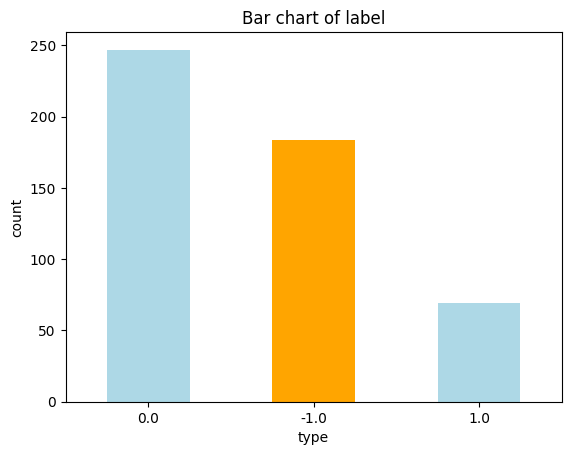

In [109]:
# EX7 bar chart
df_sample.label.value_counts().plot(kind='bar'
    , title='Bar chart of label'
    , xlabel='type'
    , ylabel='count'
    , color=['lightblue', 'orange']
    , rot=0)

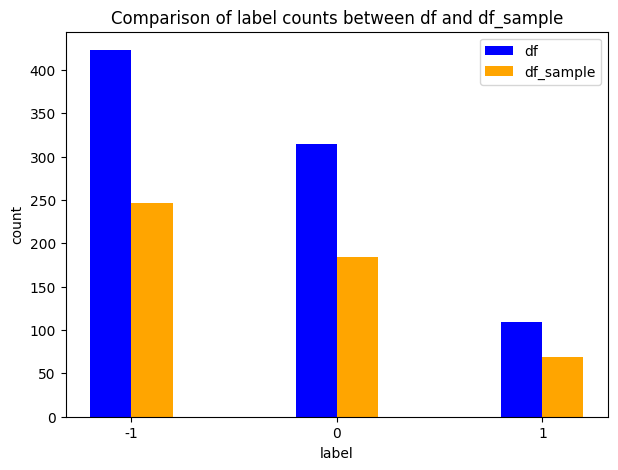

In [ ]:
# EX8 camparison between df and df_sample
bar_width = 0.2 # width of each bar
df_index = np.arange(-1,2,1)
fig ,ax = plt.subplots(figsize=(7,5))
ax.bar(df_index, df.label.value_counts(), bar_width, label='df', color='blue') # first bar(df)
ax.bar(df_index + bar_width, df_sample.label.value_counts(), bar_width, label='df_sample', color='orange') # second bar(df_sample)
ax.set_xlabel('label')
ax.set_ylabel('count')
ax.set_title('Comparison of label counts between df and df_sample')
ax.set_xticks(df_index + bar_width / 2)
ax.set_xticklabels(['-1', '0', '1'])
ax.legend()
plt.show()

#### feature subset selection

In [111]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_count = count_vect.fit_transform(df['text'])
print(df_count[1])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 23 stored elements and shape (1, 4346)>
  Coords	Values
  (0, 3696)	1
  (0, 388)	1
  (0, 2024)	2
  (0, 2310)	1
  (0, 4244)	1
  (0, 1168)	1
  (0, 3858)	1
  (0, 1409)	1
  (0, 2402)	1
  (0, 538)	1
  (0, 1083)	1
  (0, 175)	2
  (0, 3628)	1
  (0, 2161)	1
  (0, 3848)	1
  (0, 1568)	1
  (0, 2878)	1
  (0, 2645)	1
  (0, 887)	1
  (0, 3477)	1
  (0, 1412)	2
  (0, 3795)	1
  (0, 2918)	1


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [112]:
analyze = count_vect.build_analyzer()
print(analyze(df['text'][1]))

['stunt', 'as', 'in', 'like', 'why', 'did', 'they', 'even', 'make', 'big', 'deal', 'about', 'starting', 'it', 'in', 'the', 'first', 'place', 'no', 'company', 'should', 'ever', 'talk', 'about', 'politics', 'ever']


In [113]:
analyze(df['text'][1])

['stunt',
 'as',
 'in',
 'like',
 'why',
 'did',
 'they',
 'even',
 'make',
 'big',
 'deal',
 'about',
 'starting',
 'it',
 'in',
 'the',
 'first',
 'place',
 'no',
 'company',
 'should',
 'ever',
 'talk',
 'about',
 'politics',
 'ever']

In [114]:
df_count.shape

(847, 4346)

In [115]:
# EX10 find out where the non-zero elements are
row, col = df_count[:50,:500].toarray().nonzero()
print(row)
print(col)
count_vect.get_feature_names_out()[col[0]]

[ 1  1  3  3  3  3  3  3  3  3  3  3  6  6  6  6  6  7  8  8  8  9  9  9
 13 13 13 13 13 13 14 17 17 17 17 17 18 19 19 19 19 19 19 19 19 19 19 19
 19 23 23 23 23 23 23 25 27 30 30 30 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 34 34 35 35
 35 35 36 36 38 39 39 39 40 40 40 41 42 42 44 44 44 44 45 46 46 47 47 49
 49]
[175 388  18 175 195 196 197 320 327 404 406 486 225 289 327 374 486 496
 133 305 473   8 327 497   8  29  77 100 346 496 499 327 343 388 486 492
 327 213 301 305 314 320 327 342 374 388 400 406 486 278 327 374 383 406
 453 473 346 176 320 441   1   9  22  38  66  80  88  90  97 100 118 149
 213 220 221 248 289 313 327 330 341 347 374 385 387 388 406 446 474 486
 487 497 374 448  61 175 327 444 303 327 486 289 346 406 230 274 374 327
 374 448  56  81 304 327   9 175 450 158 406 327 374]


'about'

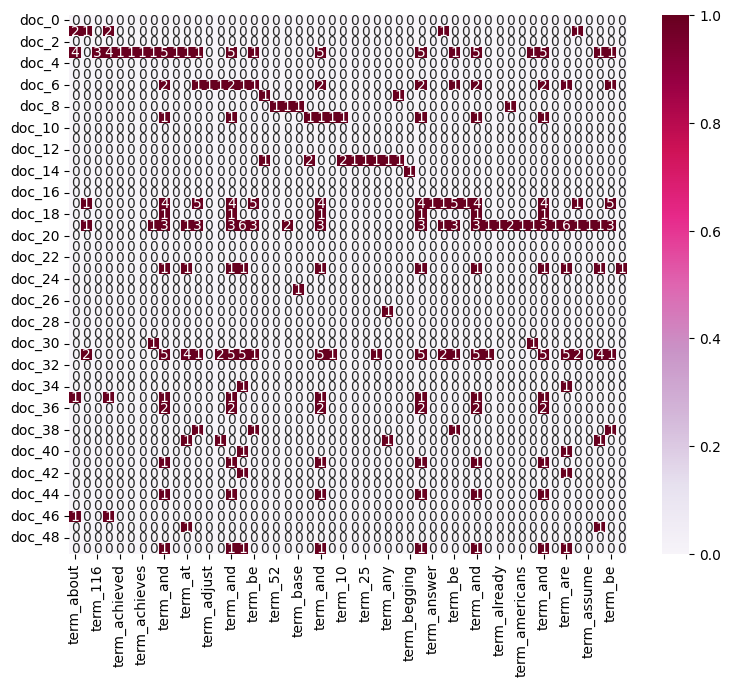

In [ ]:
# EX11 使用.nonzero()找出前50筆文件中，所有出現過的前20個大於等於1的term有哪些及其index，並繪製成heatmap
row, col = df_count[:50,:500].toarray().nonzero()
# 設定heatmap的x,y軸及z值
# 只取前50個term來畫圖
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[col[0:50]]]
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:50]]
plot_z = df_count[0:50, col[0:50]].toarray() 
# draw heatmap
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

#### Attribute Transformation / Aggregation

In [117]:
term_freq = []
for i in range(0, df_count.shape[1]):
    term_freq.append(sum(df_count[:,i]).toarray())
term_freq = np.asarray(df_count.sum(axis=0))[0]
term_freq[0]

np.int64(4)

In [118]:
# EX12 use poltly to draw the term frequency distribution
term_freq_df = pd.DataFrame({'term': count_vect.get_feature_names_out()[:300], 'frequency': term_freq[:300]})
fig = px.bar(term_freq_df, x='term', y='frequency', title='First 300 terms frequency distribution')
fig.show()

In [ ]:
# EX13 選擇一定出現頻率以上的顯示
df_index = np.where(term_freq >= 5)[0] # 5只是個範例，可以根據需求調整
term_freq_df = pd.DataFrame({'term': count_vect.get_feature_names_out()[df_index], 'frequency': term_freq[df_index]})
fig = px.bar(term_freq_df, x='term', y='frequency', title='term frequency >= 5')
fig.show()

In [ ]:
# EX14 按大小排列並做長尾曲線圖
df_index = np.where(term_freq >= 10)[0] # 10只是個範例，可以根據需求調整
term_freq_df = pd.DataFrame({'term': count_vect.get_feature_names_out()[df_index], 'frequency': term_freq[df_index]})
term_freq_df = term_freq_df.sort_values(by='frequency', ascending=False).reset_index(drop=True)
# 定義分界點
head_tail_point = int(len(term_freq_df) * 0.1)  # 例如前10%為head
fig = go.Figure()
# draw head and tail with different colors
# head: lightgreen, blue line
fig.add_trace(go.Scatter(x=term_freq_df['term'][:head_tail_point], 
                         y=term_freq_df['frequency'][:head_tail_point],
                         mode='lines',
                         fill='tozeroy',
                         fillcolor='lightgreen',
                         name='Head (Top 10%)',
                         marker=dict(color='blue', size=8)))
# tail: yellow, orange line
fig.add_trace(go.Scatter(x=term_freq_df['term'][head_tail_point-1:],
                         y=term_freq_df['frequency'][head_tail_point-1:],
                         mode='lines',
                         fill='tozeroy',
                         fillcolor='yellow',
                         name='Tail (Bottom 90%)',
                         marker=dict(color='orange', size=6, opacity=0.5)))
fig.update_layout(title='Term Frequencies for Terms Appearing at least 5 times',
                  xaxis_title='Terms', yaxis_title='Frequencies', xaxis_tickangle=-90)
fig.show()

In [121]:
# ex15
term_freq_log =np.array([math.log(freq) if freq > 0 else 0 for freq in term_freq])
df_index = np.where(term_freq >= 10)[0] # 1000只是個範例，可以根據需求調整
term_freq_df = pd.DataFrame({'term': count_vect.get_feature_names_out()[df_index], 'frequency': term_freq_log[df_index]})
term_freq_df = term_freq_df.sort_values(by='frequency', ascending=False).reset_index(drop=True)
# 定義分界點
head_tail_point = int(len(term_freq_df) * 0.1)  # 例如前10%為head
fig = go.Figure()
fig.add_trace(go.Scatter(x=term_freq_df['term'][:head_tail_point], 
                         y=term_freq_df['frequency'][:head_tail_point],
                         mode='lines',
                         fill='tozeroy',
                         fillcolor='lightgreen',
                         name='Head (Top 10%)',
                         marker=dict(color='blue', size=8)))
fig.add_trace(go.Scatter(x=term_freq_df['term'][head_tail_point-1:],
                         y=term_freq_df['frequency'][head_tail_point-1:],
                         mode='lines',
                         fill='tozeroy',
                         fillcolor='yellow',
                         name='Tail (Bottom 90%)',
                         marker=dict(color='orange', size=6, opacity=0.5)))
fig.update_layout(title='Term Frequencies for Terms Appearing at least 5 times',
                  xaxis_title='Terms', yaxis_title='Frequencies', xaxis_tickangle=-90)
fig.show()


## Third

### Pie Chart

In [ ]:
# 圓餅圖 label 的占比
label_counts = df['label'].value_counts()
label_counts[:]
# 資料準備
category =['Neutral', 'Negative' , 'Positive']
value = label_counts.values
# 繪圖
fig = go.Figure(data=[go.Pie(labels=category, values=value, hole=.4)])
fig.update_traces(textposition='inside', textinfo='percent+label')

In [ ]:
# 圓餅圖 type 的占比
type_counts = df['type'].value_counts()
print(type_counts[:])
# 資料準備
category = type_counts.index.tolist()
value = type_counts.values
# 繪圖
fig = go.Figure(data=[go.Pie(labels=category, values=value, hole=.4)])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

type
comment    783
post        64
Name: count, dtype: int64


### Time Series distribution of type and label

In [ ]:
# 根據datetime繪製type和label的時間序列分佈圖
datetime_df = pd.DataFrame({'datetime' : df.datetime, 'type': df.type, 'label': df.label})
datetime_df = datetime_df.sort_values(by='datetime', ascending=False).reset_index(drop=True)
fig = px.scatter(datetime_df, x='datetime', y='type', color='label', title='Time Series of Type and Label', labels={'type': 'Type', 'label': 'Label'})
fig.show()

# Phase 2

In [125]:
### Begin Assignment Here